In [1]:
from __future__ import division, print_function, unicode_literals
from numpy import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as mplot
import math
import random
from sklearn.cluster import KMeans
import scipy.io
import shutil
import os
# from tsne.tsne_python.tsne import tsne
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
mat = scipy.io.loadmat('./data/mnist_small.mat')
X = mat['X']
Y = mat['Y']
X.shape,Y.shape

((10000, 784), (10000, 1))

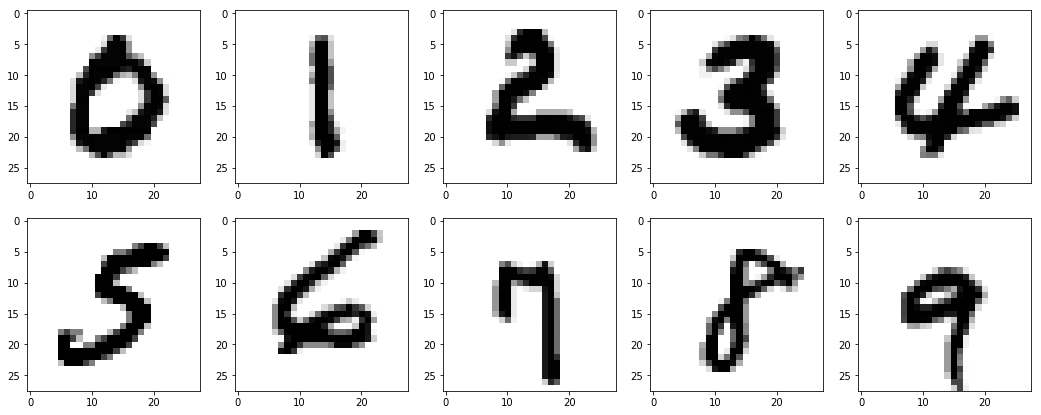

In [3]:
nums=np.array([0,1000,2700,3500,4700,5800,6800,7000,8200,9500])
fig=mplot.figure(figsize=(18,7))
for i in range(nums.size):
    mplot.subplot(2,5,i+1)
    mplot.imshow(X[nums[i]].reshape(28,28),cmap='binary')
mplot.show()

### K-means with K=10

In [4]:
pca = PCA(n_components=2)
Z_pca=pca.fit_transform(X)

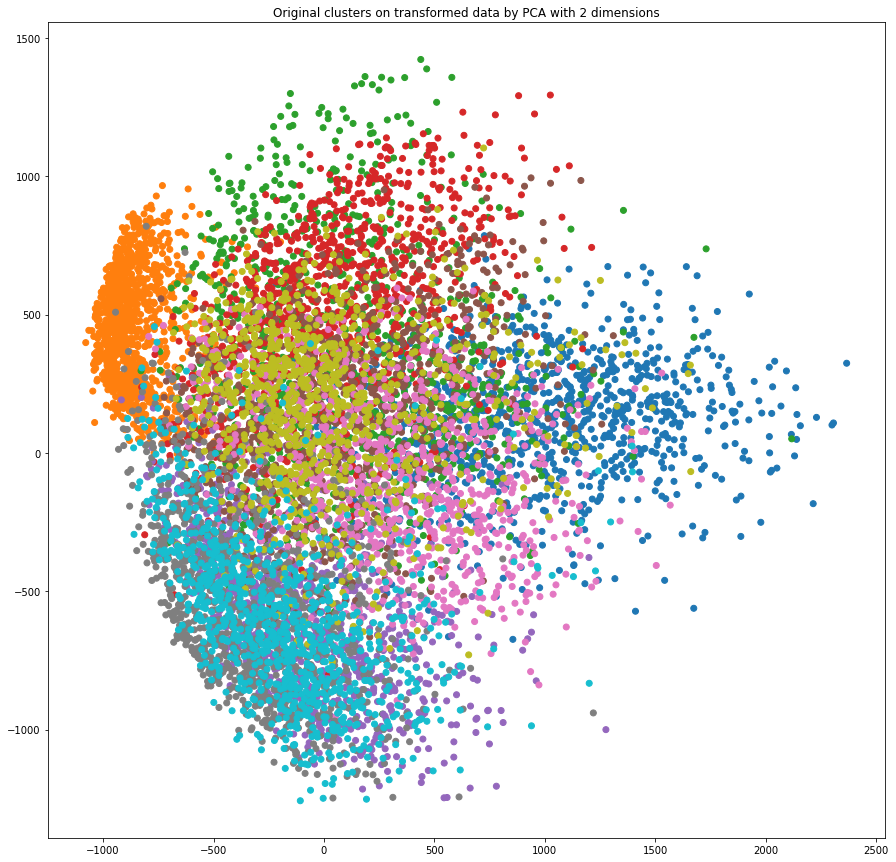

In [13]:
N=Z_pca.shape[0]
fig = mplot.figure(figsize=(15,15))
col = np.asarray(Y.reshape(N))
mplot.scatter(Z_pca[:,0],Z_pca[:,1],c=col,facecolors='none',cmap='tab10')
mplot.title('Original clusters on transformed data by PCA with 2 dimensions')
mplot.savefig('./fig/PCA/PCA_orig',bbox_inches='tight')
mplot.show()

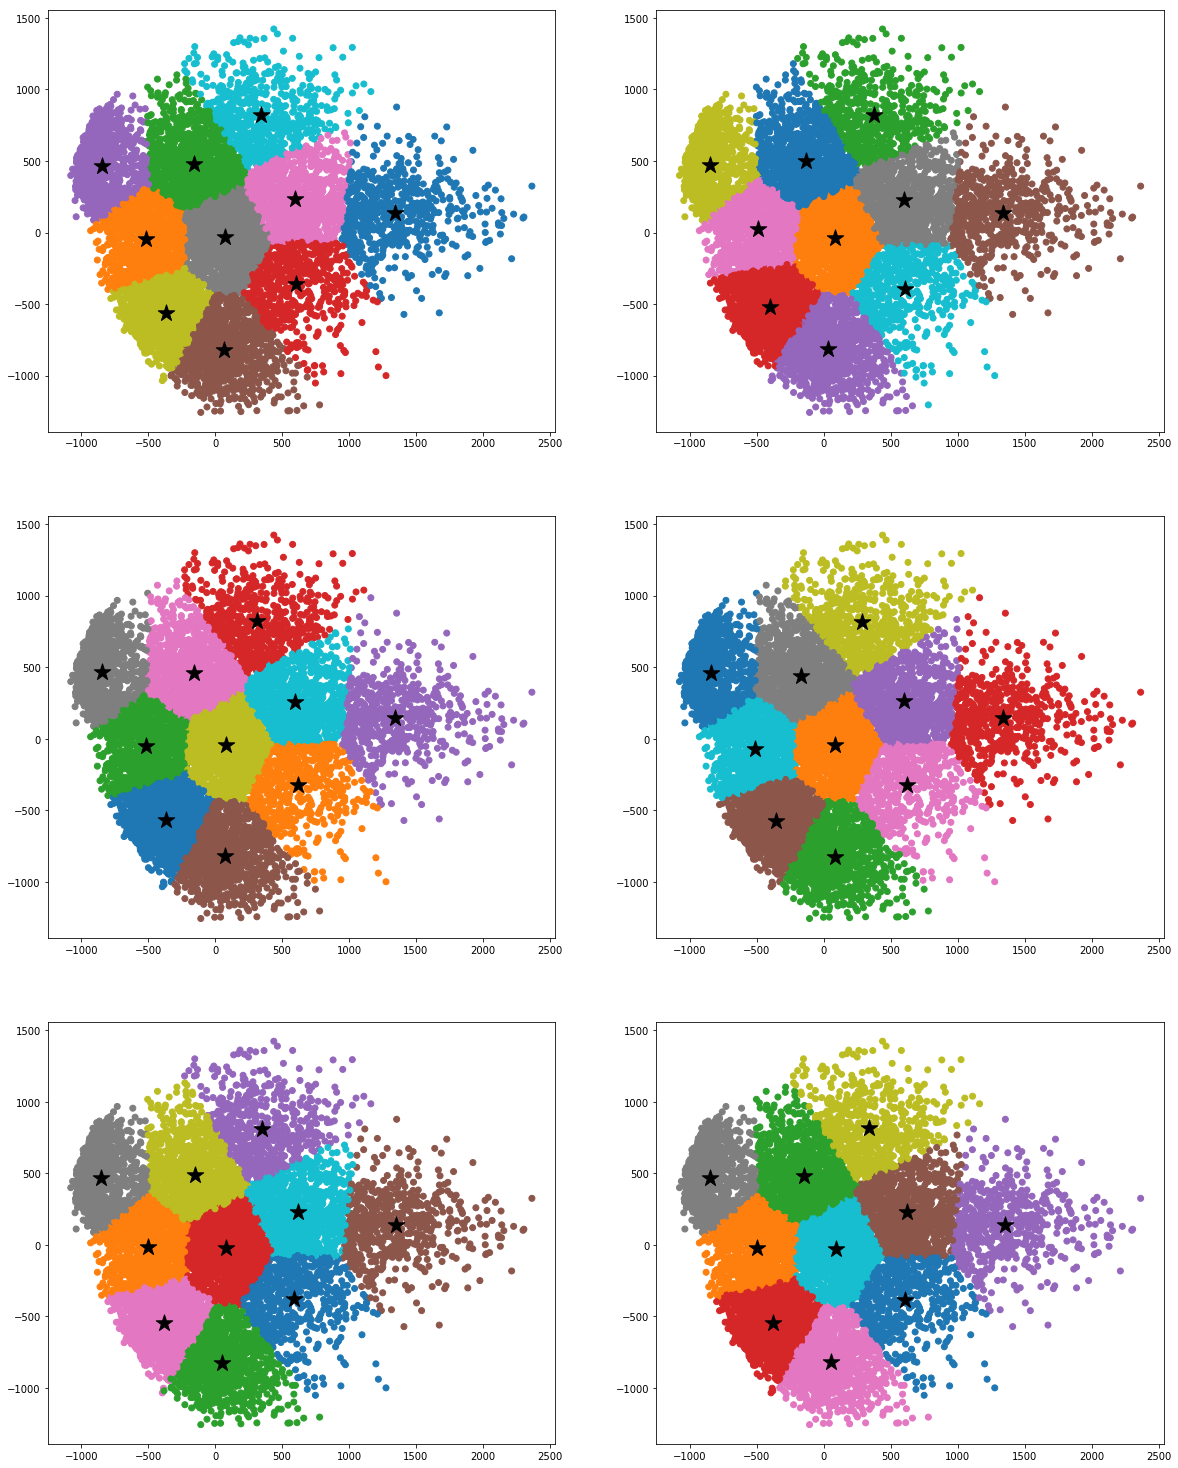

In [17]:
fig = mplot.figure(figsize=(20,45))
mplot.title('K-means clustering with 10 clusters on transformed data by PCA with 2 dimensions')
for i in range(6):
    state = np.random.randint(100)
    kmeans = KMeans(n_clusters=10, random_state=state).fit(Z_pca)
    y_pca=kmeans.predict(Z_pca)
    centres = kmeans.cluster_centers_
    col = np.asarray(y_pca.reshape(N))
    mplot.subplot(5,2,i+1)
    mplot.scatter(Z_pca[:,0],Z_pca[:,1],c=col,facecolors='none',cmap='tab10')
    mplot.scatter(centres[:,0],centres[:,1],color='k',marker='*',s=300)
mplot.savefig('./fig/PCA/PCA_pred_1',bbox_inches='tight')
mplot.show()

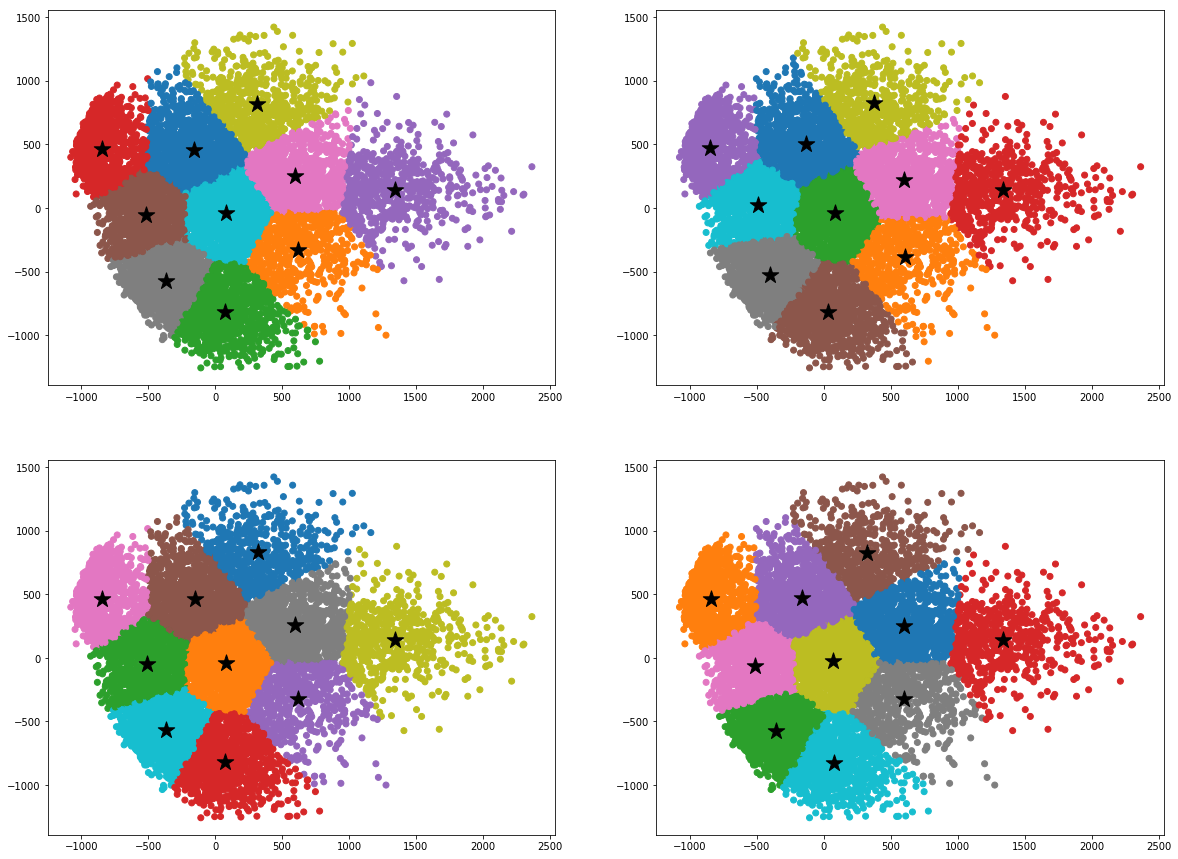

In [22]:
fig = mplot.figure(figsize=(20,40))
mplot.title('K-means clustering with 10 clusters on transformed data by PCA with 2 dimensions')
for i in range(4):
    state = np.random.randint(100)
    kmeans = KMeans(n_clusters=10, random_state=state).fit(Z_pca)
    y_pca=kmeans.predict(Z_pca)
    centres = kmeans.cluster_centers_
    col = np.asarray(y_pca.reshape(N))
    mplot.subplot(5,2,i+1)
    mplot.scatter(Z_pca[:,0],Z_pca[:,1],c=col,facecolors='none',cmap='tab10')
    mplot.scatter(centres[:,0],centres[:,1],color='k',marker='*',s=300)
mplot.savefig('./fig/PCA/PCA_pred_2',bbox_inches='tight')
mplot.show()

In [9]:
ts = TSNE(n_components=2).fit_transform(X)

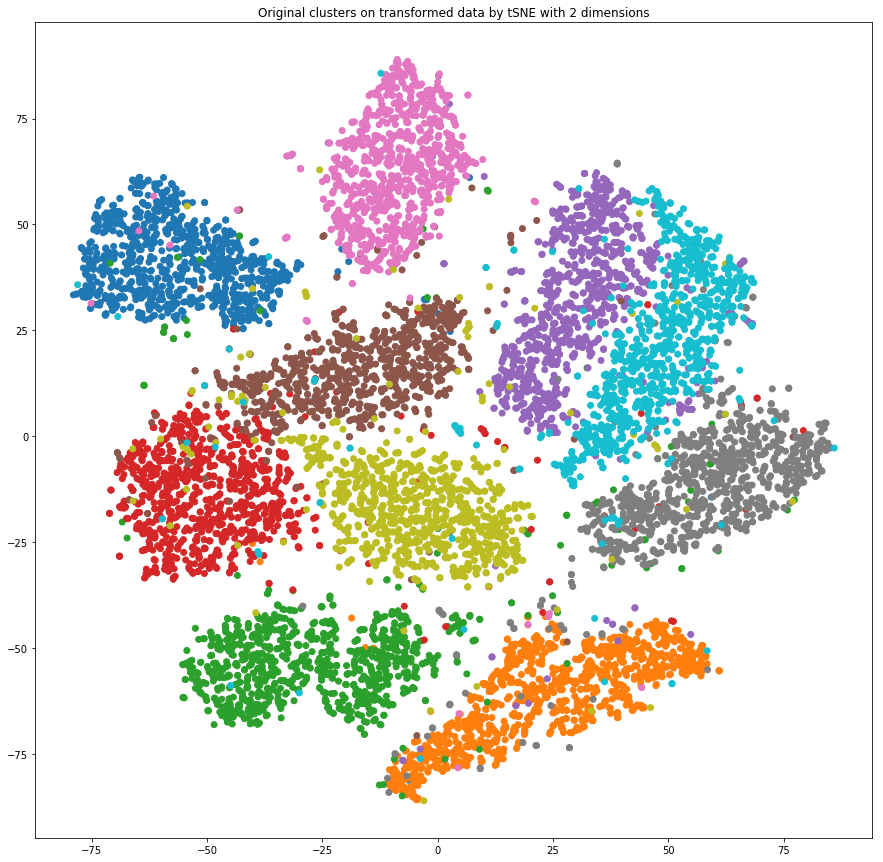

In [19]:
fig = mplot.figure(figsize=(15,15))
col = np.asarray(Y.reshape(N))
mplot.scatter(ts[:,0],ts[:,1],c=col,facecolors='none',cmap='tab10')
mplot.title('Original clusters on transformed data by tSNE with 2 dimensions')
mplot.savefig('./fig/tsne/tsne_orig',bbox_inches='tight')
mplot.show()

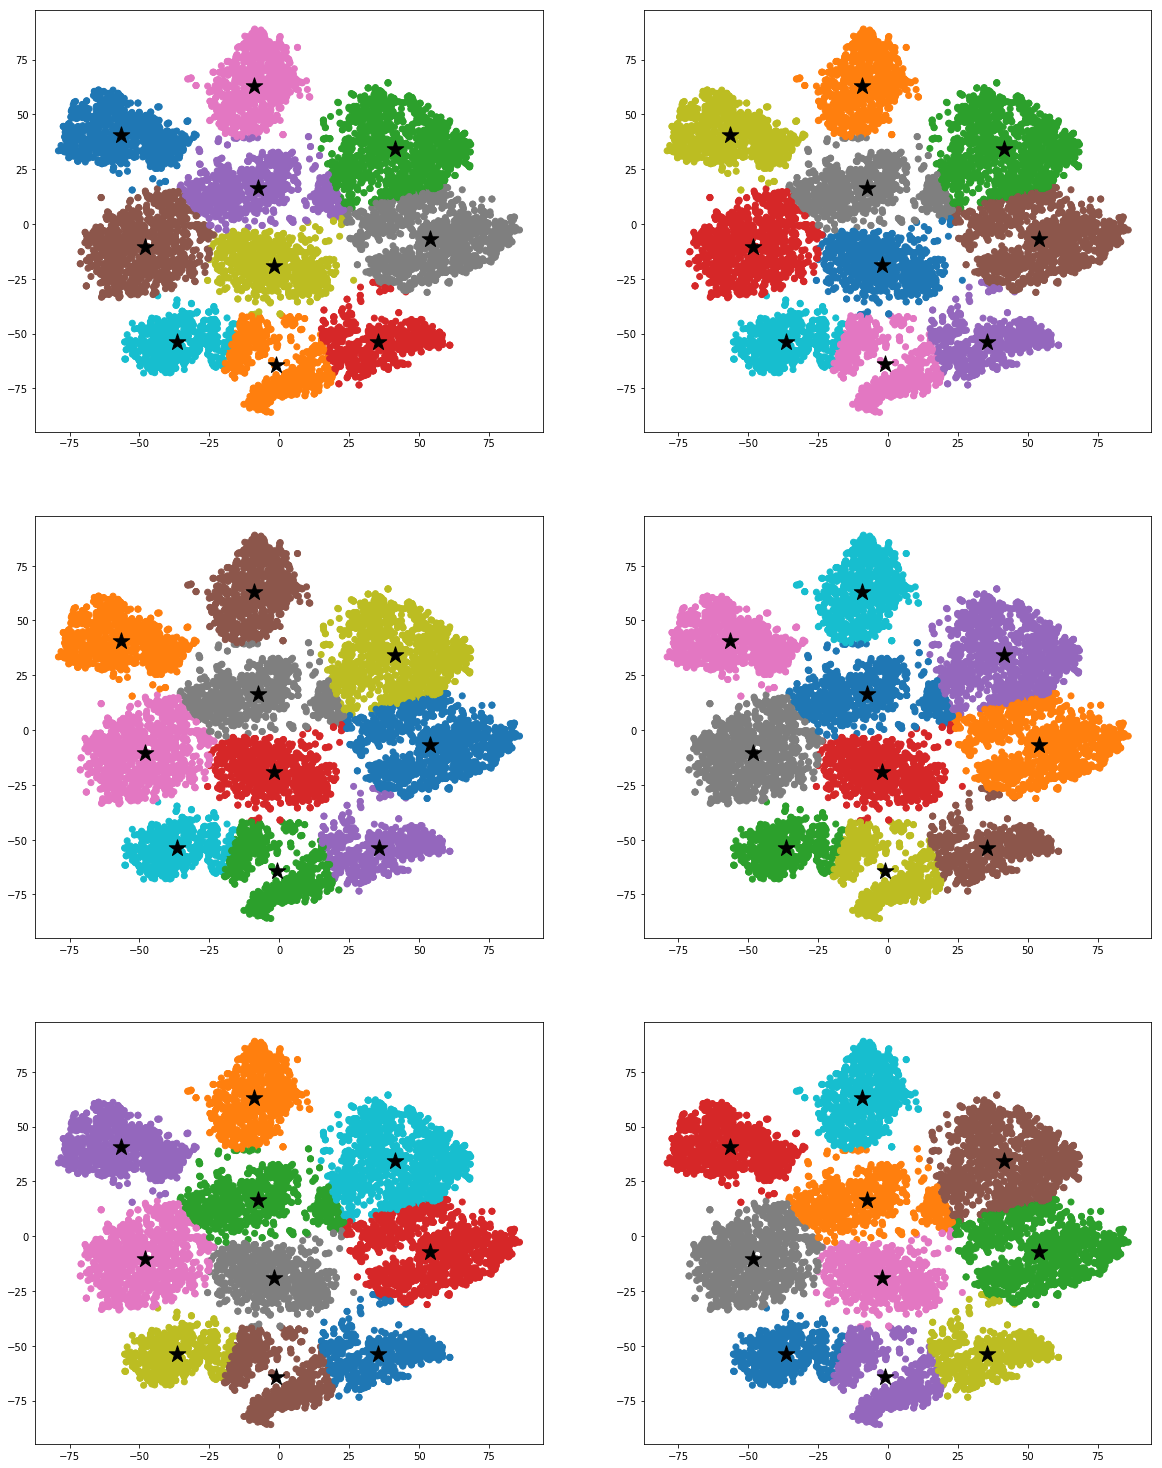

In [20]:
fig = mplot.figure(figsize=(20,45))
mplot.title('K-means clustering with 10 clusters on transformed data by tSNE with 2 dimensions')
for i in range(6):
    state = np.random.randint(100)
    kmeans = KMeans(n_clusters=10, random_state=state).fit(ts)
    y_tsne=kmeans.predict(ts)
    centres_ts = kmeans.cluster_centers_
    mplot.subplot(5,2,i+1)
    col = np.asarray(y_tsne.reshape(N))
    mplot.scatter(ts[:,0],ts[:,1],c=col,facecolors='none',cmap='tab10')
    mplot.scatter(centres_ts[:,0],centres_ts[:,1],color='k',marker='*',s=300)
mplot.savefig('./fig/tsne/tsne_pred_1',bbox_inches='tight')
mplot.show()

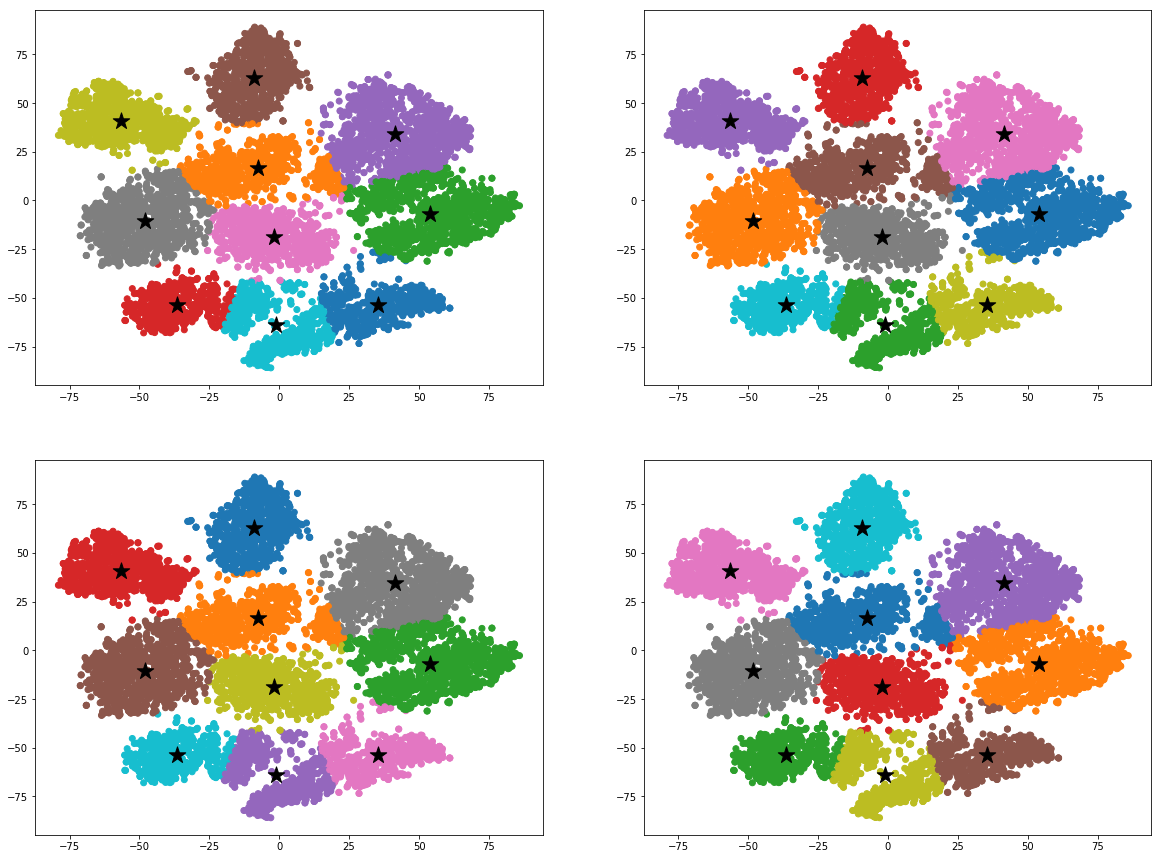

In [23]:
fig = mplot.figure(figsize=(20,40))
mplot.title('K-means clustering with 10 clusters on transformed data by tSNE with 2 dimensions')
for i in range(4):
    state = np.random.randint(100)
    kmeans = KMeans(n_clusters=10, random_state=state).fit(ts)
    y_tsne=kmeans.predict(ts)
    centres_ts = kmeans.cluster_centers_
    mplot.subplot(5,2,i+1)
    col = np.asarray(y_tsne.reshape(N))
    mplot.scatter(ts[:,0],ts[:,1],c=col,facecolors='none',cmap='tab10')
    mplot.scatter(centres_ts[:,0],centres_ts[:,1],color='k',marker='*',s=300)
mplot.savefig('./fig/tsne/tsne_pred_2',bbox_inches='tight')
mplot.show()